# Model 4

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score, roc_curve
import numpy as np

In [2]:
model_df = pd.read_csv("status.csv")
model_df.head()

,hypertension,heart_disease,diabetes,problematic,gender,smoking_history_No Info,smoking_history_current,smoking_history_not current,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,0,0,0,0.0,0.0,1.0,1.000000,-0.645658,0.127273,-0.454545
1,0,0,0,0,0,1.0,0.0,0.0,0.349349,-0.595938,0.127273,-1.000000
2,0,0,0,0,1,0.0,0.0,1.0,-0.301301,-0.595938,-0.200000,-0.290909
3,0,0,0,0,0,0.0,1.0,0.0,-0.101101,-0.686275,-0.454545,-0.318182
4,1,1,0,0,1,0.0,1.0,0.0,0.899900,-0.763539,-0.527273,-0.318182


In [3]:
# Define features (X) and target (y)
X = model_df.drop("diabetes",axis=1)
y = model_df["diabetes"]

In [4]:
# Split data into training and test sets
X_train_, X_test, y_train_, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
X_train_.shape,X_test.shape

((89983, 11), (9999, 11))

In [5]:
# Random Under-Sampling to balance the training set
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train_, y_train_)

/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [6]:
# Encode target variable using One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None)
y_train_encoded = encoder.fit_transform(y_train.to_frame())
y_test_encoded = encoder.transform(y_test.to_frame())
y_train_encoded, y_test_encoded

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

In [7]:
len(y_train_encoded), len(y_test_encoded),len(X_train), len(X_test)

(15300, 9999, 15300, 9999)

In [8]:
# Build a neural network model 
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy',"recall"])
model.summary()

# Train the model with early stopping to prevent overfitting
h = model.fit(
    X_train, y_train_encoded,
    epochs=200,
    batch_size=128,
    callbacks = EarlyStopping(
    monitor='val_loss',   
    patience=15),
    verbose=1,
    validation_data=(X_test, y_test_encoded) 
)


/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-24 19:32:09.000118: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-24 19:32:09.000512: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-24 19:32:09.000522: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-24 19:32:09.000557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-24 19:32:09.000566: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,434 (103.26 KB)

 Trainable params: 26,434 (103.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-08-24 19:32:09.515357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8468 - loss: 0.3294 - recall: 0.8468 - val_accuracy: 0.9260 - val_loss: 0.1774 - val_recall: 0.9260
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8885 - loss: 0.2386 - recall: 0.8885 - val_accuracy: 0.8861 - val_loss: 0.2429 - val_recall: 0.8861
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8834 - loss: 0.2431 - recall: 0.8834 - val_accuracy: 0.8911 - val_loss: 0.2389 - val_recall: 0.8911
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8845 - loss: 0.2465 - recall: 0.8845 - val_accuracy: 0.8980 - val_loss: 0.2272 - val_recall: 0.8980
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8894 - loss: 0.2338 - recall: 0.8894 - val_accuracy: 0.8947 - val_loss: 0.2333 - val_recall: 0.8947
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8905 - loss: 0.2359 - recall: 0.8905 - val_accuracy: 0.8963 - val_loss: 0.2324 - val_recall: 0.8963
Epoc

In [9]:
# Plot training vs validation accuracy and loss across epochs
def LossHistory (history):
    # Accuracy 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

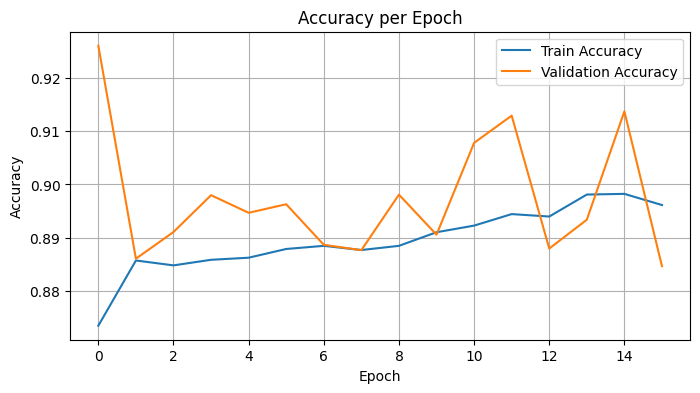

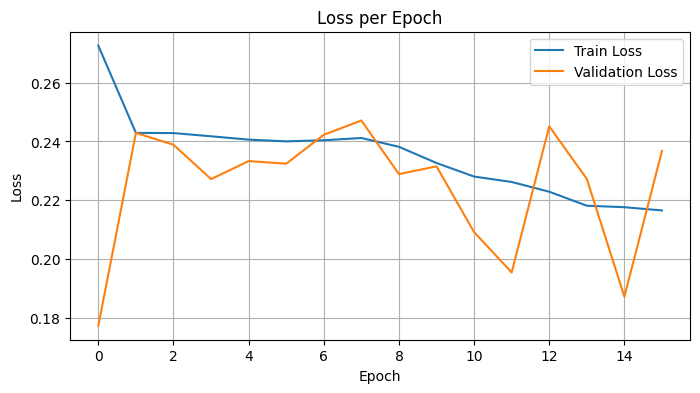

In [10]:
LossHistory(h)

In [11]:
# Evaluate model performance on train set
y_pred_prob_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_prob_train, axis=1)
y_true_train = np.argmax(y_train_encoded, axis=1)

print(classification_report(y_true_train, y_pred_train))

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7650
           1       0.88      0.92      0.90      7650

    accuracy                           0.90     15300
   macro avg       0.90      0.90      0.90     15300
weighted avg       0.90      0.90      0.90     15300



In [12]:
# Evaluate model performance on test set
y_pred_prob_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_true, y_pred_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      9149
           1       0.42      0.92      0.58       850

    accuracy                           0.88      9999
   macro avg       0.71      0.90      0.75      9999
weighted avg       0.94      0.88      0.90      9999



In [13]:
# Generate confusion matrix to evaluate classification results
cm = confusion_matrix(y_true, y_pred_test)
cm

array([[8063, 1086],
       [  67,  783]])

In [14]:
# AUC calculation
# y_pred_prob[:,1] = predicted probability for class 1(diabetes)
auc = roc_auc_score(y_true, y_pred_prob_test[:, 1])
print("AUC score:", auc)

AUC score: 0.9718507326419473


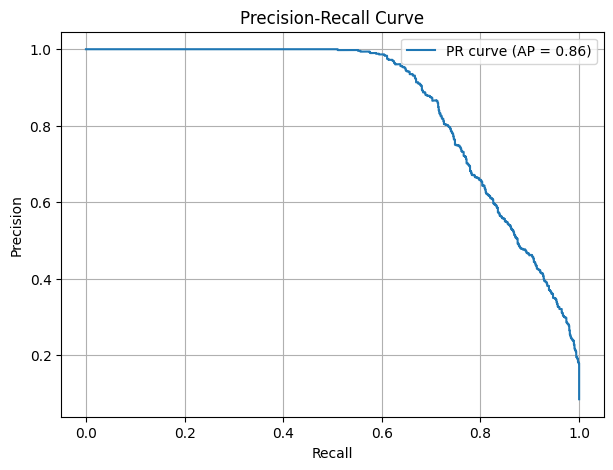

In [15]:
#Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob_test[:, 1])

ap = average_precision_score(y_true, y_pred_prob_test[:, 1])

plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [16]:
valid_idx = np.where(recall > 0.85)

precision_valid = precision[valid_idx]
recall_valid = recall[valid_idx]
thresholds_valid = thresholds[valid_idx[0]-1]  

best_idx = np.argmax(precision_valid)
best_precision = precision_valid[best_idx]
best_recall = recall_valid[best_idx]
best_threshold = thresholds_valid[best_idx]

print("Best Threshold:", best_threshold)

y_pred_opt = (y_pred_prob_test[:, 1] >= best_threshold).astype(int)


print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_true, y_pred_opt))

cm_opt = confusion_matrix(y_true, y_pred_opt)
print("Confusion Matrix (Optimized Threshold):\n", cm_opt)

Best Threshold: 0.6980939

Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      9149
           1       0.55      0.85      0.67       850

    accuracy                           0.93      9999
   macro avg       0.77      0.89      0.81      9999
weighted avg       0.95      0.93      0.93      9999

Confusion Matrix (Optimized Threshold):
 [[8557  592]
 [ 127  723]]
